In [13]:
%pylab inline
import numpy as np
import tensorflow as tf

Populating the interactive namespace from numpy and matplotlib


# Softmax Classifier

* http://cs231n.github.io/linear-classify/#softmax 참고 
* https://eli.thegreenplace.net/2016/the-softmax-function-and-its-derivative/


Softmax function은 N-dimensional vector를 받아서 다시 N-dimensional vector로 return을 합니다. <br>
이때 output은 0~1 사이의 확률분포를 갖으며, 전체의 합은 1이 됩니다. $ S(a) : \mathbb{R}^{\mathbb{N}} \rightarrow \mathbb{R}^{\mathbb{N}} $

각각의 element단위의 공식은 다음과 같습니다. 

$$ S_i = \frac{e^{x_i}}{\sum^N_{k=1} e^{x_k}} $$

$ S_i $ 는 exponent연산을 하기 때문에 항상 positive 값을 갖습니다.<br>
또한 numerator부분이 denominator에서 합쳐져서 나오기 때문에  0~1 사이의 확률분포로 값이 나오게 됩니다.

# Derivative of softmax

## Example 1

아래 예제에서 `[1.0, 2.0, 3.0]` 은 softmax함수에 의해서 `[0.09, 0.24, 0.67]` 로 transform되어야 하며, 합은 1이 되어야 합니다.

In [12]:
def softmax(x):
    exp_x = np.exp(x)
    return exp_x/np.sum(exp_x, axis=0)

a = [1, 2, 3]
b = softmax(a)

print('value    :', a)
print('softmax  :', b)
print('summed up:', np.sum(b))

value    : [1, 2, 3]
softmax  : [ 0.09003057  0.24472847  0.66524096]
summed up: 1.0


## Example 2

* [Udacity - Softmax](https://classroom.udacity.com/courses/ud730/lessons/6370362152/concepts/63815621490923#)

1번정답 <br>
```
[ 0.09003057  0.24472847  0.66524096]
```

2번정답<br>
```
[[ 0.09003057  0.00242826  0.01587624  0.33333333]
 [ 0.24472847  0.01794253  0.11731043  0.33333333]
 [ 0.66524096  0.97962921  0.86681333  0.33333333]]
```

[softmax result1]
[ 0.09003057  0.24472847  0.66524096]
sum: 1.0

[softmax result2]
[[ 0.00626879  0.01704033  0.04632042  0.93037045]
 [ 0.01203764  0.08894681  0.24178252  0.65723306]
 [ 0.00446236  0.66227239  0.24363641  0.08962882]]
sum: [ 1.  1.  1.]


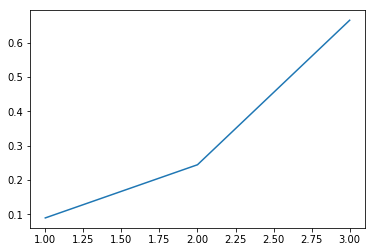

In [71]:
scores1 = np.array([1.0, 2.0, 3.0])
scores2 = np.array([[1, 2, 3, 6],
                    [2, 4, 5, 6], 
                    [3, 8, 7, 6]], dtype=np.float32)

def softmax(x):
    level = len(x.shape) -1
    exp_x = np.exp(x)
    if level == 0:
        return exp_x/np.sum(exp_x, axis=0)
    if level == 1:
        return exp_x/np.sum(exp_x, axis=1).reshape(-1, 1)

plot(scores1, softmax(scores1))

print('[softmax result1]')
print(softmax(scores1))
print('sum:', np.sum(softmax(scores1), axis=0))

print('\n[softmax result2]')
print(softmax(scores2))
print('sum:', np.sum(softmax(scores2), axis=1))

# TensorFlow Example

In [15]:
gpu_options = tf.GPUOptions(per_process_gpu_memory_fraction=0.01, allow_growth=True)
sess = tf.Session(config=tf.ConfigProto(gpu_options=gpu_options))

In [73]:
result1 = tf.nn.softmax(scores1)
result2 = tf.nn.softmax(scores2)

print('[Softmax Result 1]')
print(sess.run(result1))
print('sum:', np.sum(sess.run(result1)))

print('\n[Softmax Result 2]')
print(sess.run(result2))
print('sum:', np.sum(sess.run(result2), axis=1))

[Softmax Result 1]
[ 0.09003057  0.24472847  0.66524096]
sum: 1.0

[Softmax Result 2]
[[ 0.00626879  0.01704033  0.04632042  0.93037045]
 [ 0.01203764  0.08894681  0.24178252  0.657233  ]
 [ 0.00446236  0.66227239  0.2436364   0.08962882]]
sum: [ 1.  1.  1.]
